<h3> rEYEker Data Analysis Functions<h3>

Make sure to have the following packages installed:

In [ ]:
"""
conda install numpy
conda install matplotlib
conda install pip
pip install bresenham
"""

<h5>Import of The Modules<h5>

In [1]:
import modules.rEYEkerAnalysis as rEYEker
import modules.semanticClassifier as semCls

<h5>Load Data from Files<h5>

In [2]:
#load some image
image = rEYEker.load_image("images/InsertSort.PNG")

#load the classifier if there are some, u can use data sheet from dataAnalysis 1.0
classifier = rEYEker.load_semantic_classifier_from_json("data/example.json")

#load the classifier if there are some, u can use data sheet from dataAnalysis 1.0
(data, times, click_setting) = rEYEker.load_data_from_json("data/example.json")

In [4]:
#custom import
data_str = "317-140 368-263 313-427 352-555 402-696 410-736 517-715 360-770 524-782 558-690 330-578 293-448 326-300 306-183"

click_data = []
coordinates_str = data_str.split(" ")
coordinates = []
for coordinate_str in coordinates_str:
    coordinate = coordinate_str.split("-")
    coordinate = (int(coordinate[0]), int(coordinate[1]))
    coordinates.append(coordinate)
click_data.append(coordinates)
    
data = click_data

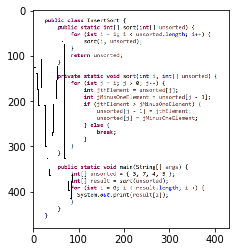

In [5]:
im = rEYEker.draw_vertical_line_diagram(image, data[0], should_copy=True)
rEYEker.display(im, normal_size=False)

<h5>Rectangle, Line, Row View<h5>

In [11]:
#draw rectangle view for one datapoint in one dataset
im0 = rEYEker.draw_rectangle_view(image, data[0][1], click_setting, should_copy=True)

#draw line view for one datapoint in one dataset
im1 = rEYEker.draw_line_view(image, data[0][1], click_setting, should_copy=True)

#draw row view for one datapoint in one dataset
im2 = rEYEker.draw_row_view(image, data[0][1], click_setting, should_copy=True)

<h5>Heatmaps<h5>

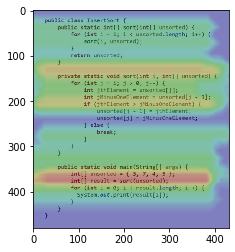

In [6]:
#draw rectangle heat map
im3 = rEYEker.draw_shape_heat_map(image, data[0], click_setting, should_copy=True)
rEYEker.display(im3, normal_size=False)

#draw vertical heat map
#im4 = rEYEker.draw_vertical_heat_map(image, data[0], click_setting, should_copy=True)

#draw horizontal heat map
#im5 = rEYEker.draw_horizontal_heat_map(image, data[0], click_setting, should_copy=True)


#rEYEker.display(im4, normal_size=False)
#rEYEker.display(im5, normal_size=False)

<h5>Line Diagramms<h5>

In [9]:
#draw vertical line diagramm
im6 = rEYEker.draw_vertical_line_diagram(image, data[0], should_copy=True)

#draw vertical line diagramm
im7 = rEYEker.draw_horizontal_line_diagram(image, data[0], should_copy=True)

<h5>Needleman Wunsch Algorithm<h5>

In [11]:
#some rounding value
rounding=40

#draw vertical NW Algorithm
(im8, result0) = rEYEker.draw_vertical_needleman_wunsch_line_diagram(image, rounding, data[0], data[1], should_copy=True)

#draw vertical NW Algorithm with semantic
(im9, result1) = rEYEker.draw_vertical_needleman_wunsch_semantic_line_diagram(image, data[0], data[1], classifier, should_copy=True)

#draw horizontal NW Algorithm
(im10, result2) = rEYEker.draw_horizontal_needleman_wunsch_line_diagram(image, rounding, data[0], data[1], should_copy=True)

#draw vertical combined NW Algorithm
(im11, result3) = rEYEker.draw_vertical_combined_needleman_wunsch_line_diagram(image, rounding, data, should_copy=True)

#draw vertical semantic combined NW Algorithm
(im12, result4) = rEYEker.draw_vertical_combined_needleman_wunsch_semantic_line_diagram(image, data, classifier, should_copy=True)

#draw horizontal combined NW Algorithm
(im13, result5) = rEYEker.draw_horizontal_combined_needleman_wunsch_line_diagram(image, rounding, data, should_copy=True)

<h5>Semanitc Classifier<h5>

In [13]:
#draw semantic classifier
(im13) = rEYEker.draw_semantic_classifier(image, classifier, should_copy=True)

#set semantic field
classifier.set_semantic_fields(0,100, "S")

#get semantic fields as tuple
fields = classifier.get_semantic_fields()

#align buffer to middle of classifiers (noise cancel)
noise_cancel = classifier.align_buffer_to_classifier(data[0])

#get the sequence of classifiers the click follow
sequence_of_classes = classifier.get_semantic_field_workflow(data[0])

<h5>Display of Image<h5>

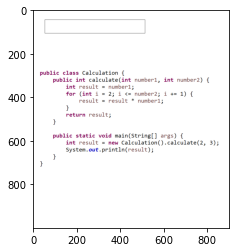

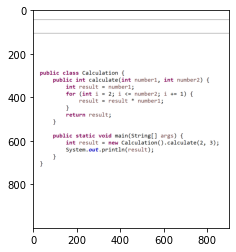

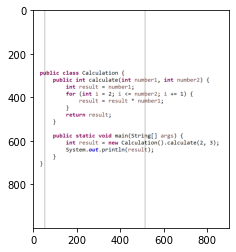

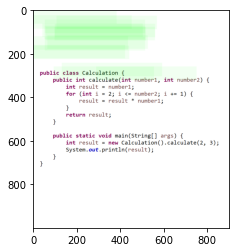

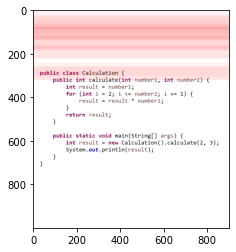

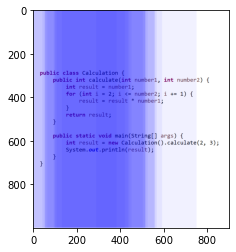

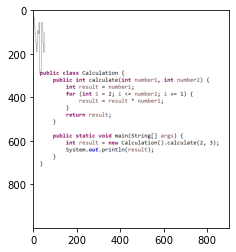

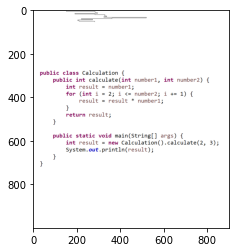

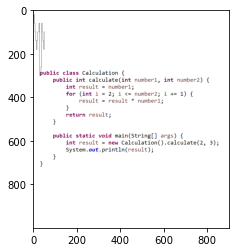

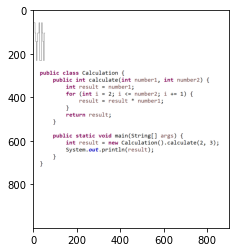

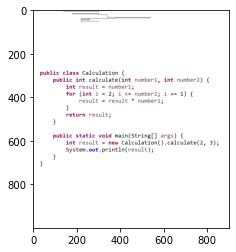

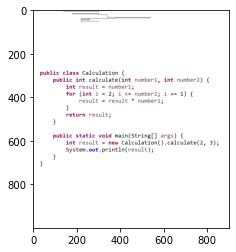

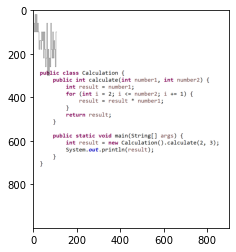

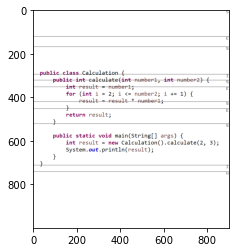

In [17]:
#display image
rEYEker.display(im0, normal_size=False)
rEYEker.display(im1, normal_size=False)
rEYEker.display(im2, normal_size=False)
rEYEker.display(im3, normal_size=False)
rEYEker.display(im4, normal_size=False)
rEYEker.display(im5, normal_size=False)
rEYEker.display(im6, normal_size=False)
rEYEker.display(im7, normal_size=False)
rEYEker.display(im8, normal_size=False)
rEYEker.display(im9, normal_size=False)
rEYEker.display(im10, normal_size=False)
rEYEker.display(im10, normal_size=False)
rEYEker.display(im11, normal_size=False)
rEYEker.display(im13, normal_size=False)

<h5>RSaving Data<h5>

In [2]:
#save semantic classifier
classifier.save_to_json("data/test_classifier.json")

#save semantic classifier
res = [x for x in data]
res.append(noise_cancel)

rEYEker.save_data_to_json("data/test_clickdata_settings.json", click_setting, res)